In [ ]:
!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

In [ ]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder


In [ ]:
iris=load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
#Convert input to numpy array
np_iris = iris_df.to_numpy()

In [ ]:
#Separate feature and target variables
X_data =iris.data
Y_data=iris.target

print("\nFeatures before scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y_data[:5])



Features before scaling :
------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling :
------------------------------------
[0 0 0 0 0]


In [ ]:
#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

In [ ]:
#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])


Features after scaling :
------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target after one-hot-encoding :
------------------------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train Test Dimensions:
------------------------------------
(135, 4) (135, 3) (15, 4) (15, 3)


In [ ]:
from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=3

In [ ]:
#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

In [ ]:
#Add the first hidden layer
model.add(keras.layers.Dense(128,         #Number of nodes
                        input_shape=(4,), #Number of input variables
                        name='Hidden-Layer-1', #Logical name
                        activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

In [ ]:
#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

In [ ]:
#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")


Training Progress:
------------------------------------


In [ ]:
#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

Epoch 1/10
7/7 [==============================] - 2s 88ms/step - loss: 0.7747 - accuracy: 0.7130 - val_loss: 0.6254 - val_accuracy: 0.7037
Epoch 2/10
7/7 [==============================] - 0s 14ms/step - loss: 0.4948 - accuracy: 0.8519 - val_loss: 0.4810 - val_accuracy: 0.8148
Epoch 3/10
7/7 [==============================] - 0s 16ms/step - loss: 0.3950 - accuracy: 0.8519 - val_loss: 0.4133 - val_accuracy: 0.7778
Epoch 4/10
7/7 [==============================] - 0s 9ms/step - loss: 0.3425 - accuracy: 0.8611 - val_loss: 0.3816 - val_accuracy: 0.7778
Epoch 5/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2973 - accuracy: 0.8796 - val_loss: 0.3895 - val_accuracy: 0.7778
Epoch 6/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2680 - accuracy: 0.8981 - val_loss: 0.3639 - val_accuracy: 0.8148
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2413 - accuracy: 0.9167 - val_loss: 0.3856 - val_accuracy: 0.8148
Epoch 8/10
7/7 [=============


Accuracy during Training :
------------------------------------


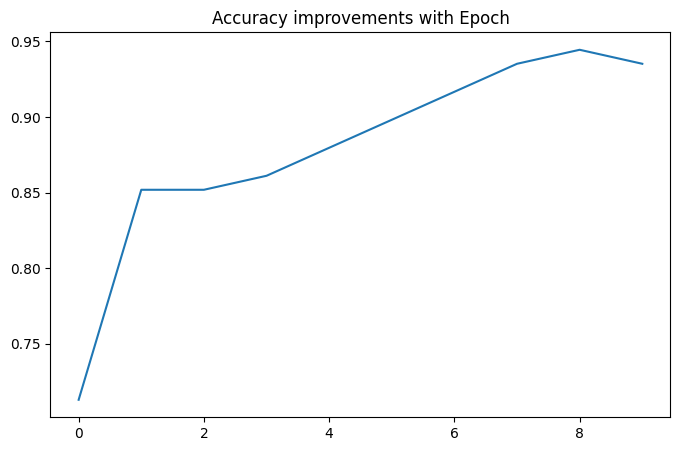

In [ ]:
print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [ ]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 36ms/step - loss: 0.2471 - accuracy: 0.8000


[0.24711427092552185, 0.800000011920929]

In [ ]:
#Saving a model
model.save("iris_save")

In [ ]:
#Loading a Model
loaded_model = keras.models.load_model("iris_save")
#Print Model Summary
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

In [ ]:
#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

In [ ]:
#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

1/1 [==============================] - 0s 94ms/step
Raw Prediction Output (Probabilities) : [[0.03168093 0.6341021  0.3342169 ]]


In [ ]:
#Find prediction
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(['Class A', 'Class B', 'Class C'])  # Replace with actual class labels

# Convert the predicted index to the original class label
predicted_class_label = label_encoder.inverse_transform([prediction_index])

print("Predicted class label is:", predicted_class_label)

Predicted class label is: ['Class B']
